In [112]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [114]:
# Standard libraries
import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tools
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Statistical modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

# Model persistence
import joblib



In [3]:
# Define the root directory of the project (you can change this to your current project folder)
project_root = r"C:\Users\ajuli\Desktop\codeveda\Task 2 level 2"

# Construct the full absolute path to the dataset
bank_full_path = os.path.join(project_root, "data", "bank-full.csv")

# Print the absolute path for confirmation
print("Correct absolute path:", bank_full_path)

# Change the working directory to the project root
os.chdir(project_root)

# Confirm that the relative path now works from the project root
print("Verified relative path:", os.path.abspath("data/bank-full.csv"))

# Load the dataset using the verified relative path
df = pd.read_csv("data/bank-full.csv", sep=";")

# Display the first 10 rows of the dataset
df.head(10)


Correct absolute path: C:\Users\ajuli\Desktop\codeveda\Task 2 level 2\data\bank-full.csv
Verified relative path: C:\Users\ajuli\Desktop\codeveda\Task 2 level 2\data\bank-full.csv


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
# Check the number of rows and columns in the dataset
print("Dataset shape:", df.shape)

Dataset shape: (45211, 17)


In [7]:
# Display general information about data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
# Check for missing values in each column
print("Missing values per column:\n", df.isna().sum())

Missing values per column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [11]:
# Check for duplicated rows
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 0


In [13]:
#Dropping 'duration' column as a leaky feature
df = df.drop('duration', axis = 1)
# Check the number of rows and columns in the dataset
print("Dataset shape:", df.shape)

Dataset shape: (45211, 16)


In [15]:
# Display summary statistics for numeric features
df.describe()

,age,balance,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


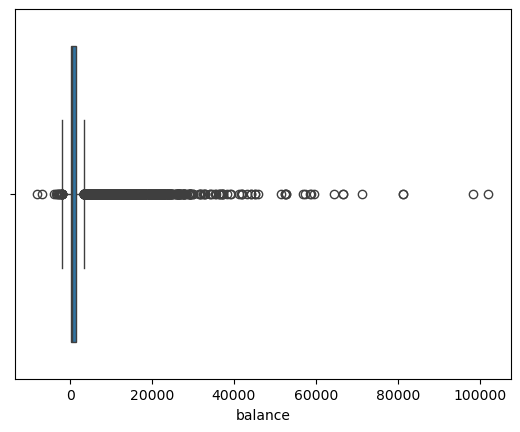

In [17]:
# Visualize the distribution of the 'balance' feature and detect potential outliers using a boxplot
sns.boxplot(x = df['balance'])
plt.show()


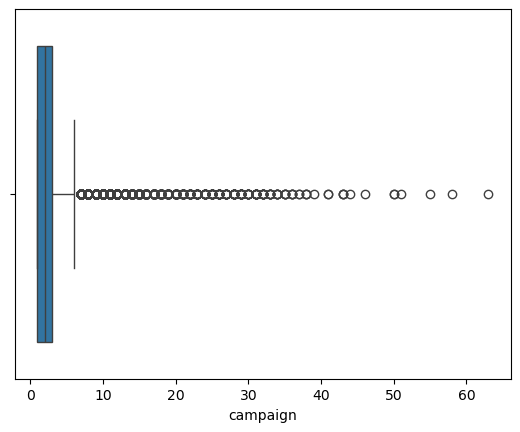

In [19]:
# Visualize the distribution of the 'campaign' feature and detect potential outliers using a boxplot
sns.boxplot(x = df['campaign'])
plt.show()

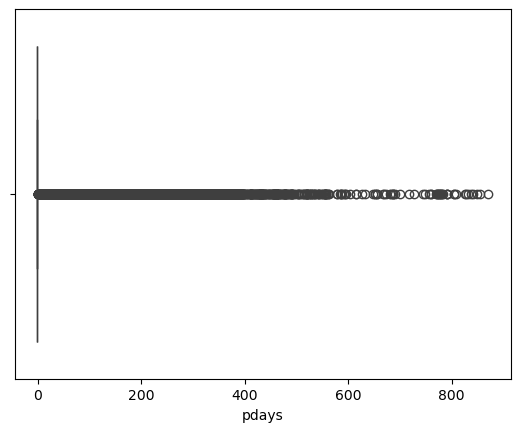

In [266]:
# Visualize the distribution of the 'pdays' feature and detect potential outliers using a boxplot
sns.boxplot(x = df['pdays'])
plt.show()

### Summary Statistics and Outlier Detection

---

#### Summary Statistics (`df.describe()`)

The `describe()` function was used to compute summary statistics for the numerical features:

- **Central tendencies** such as `mean`, `median (50%)`, and `std` were observed.
- Large gaps between the mean and max values indicate **strong right-skew** and potential outliers.
  - Example: `balance` has a mean ≈ 1362 but a max of 102,127.
  - `campaign`, `pdays`, and `previous` also show unusually high maximum values.
- `pdays` includes a value of `-1`, representing clients who were not previously contacted — this needs special treatment later.

---

#### Outlier Detection (Boxplots)

Boxplots were generated for several skewed numerical columns:

- **`balance`:** Displays many extreme values on the right. Large positive outliers are clearly visible.
- **`campaign`:** Most values are concentrated below 10, but outliers reach beyond 60 contacts.
- **`pdays`:** Highly skewed with a large number of `-1` values (non-contacted), and significant positive outliers above 600.

These visualizations confirm that:
- Several variables contain extreme values that may distort scaling and modeling.
- Transformations like **log-scaling**, **binarization**, or **capping** may be applied in preprocessing if needed.

---

Conclusion: Numerical features exhibit significant skewness and outliers. These insights will guide appropriate preprocessing steps before model training.


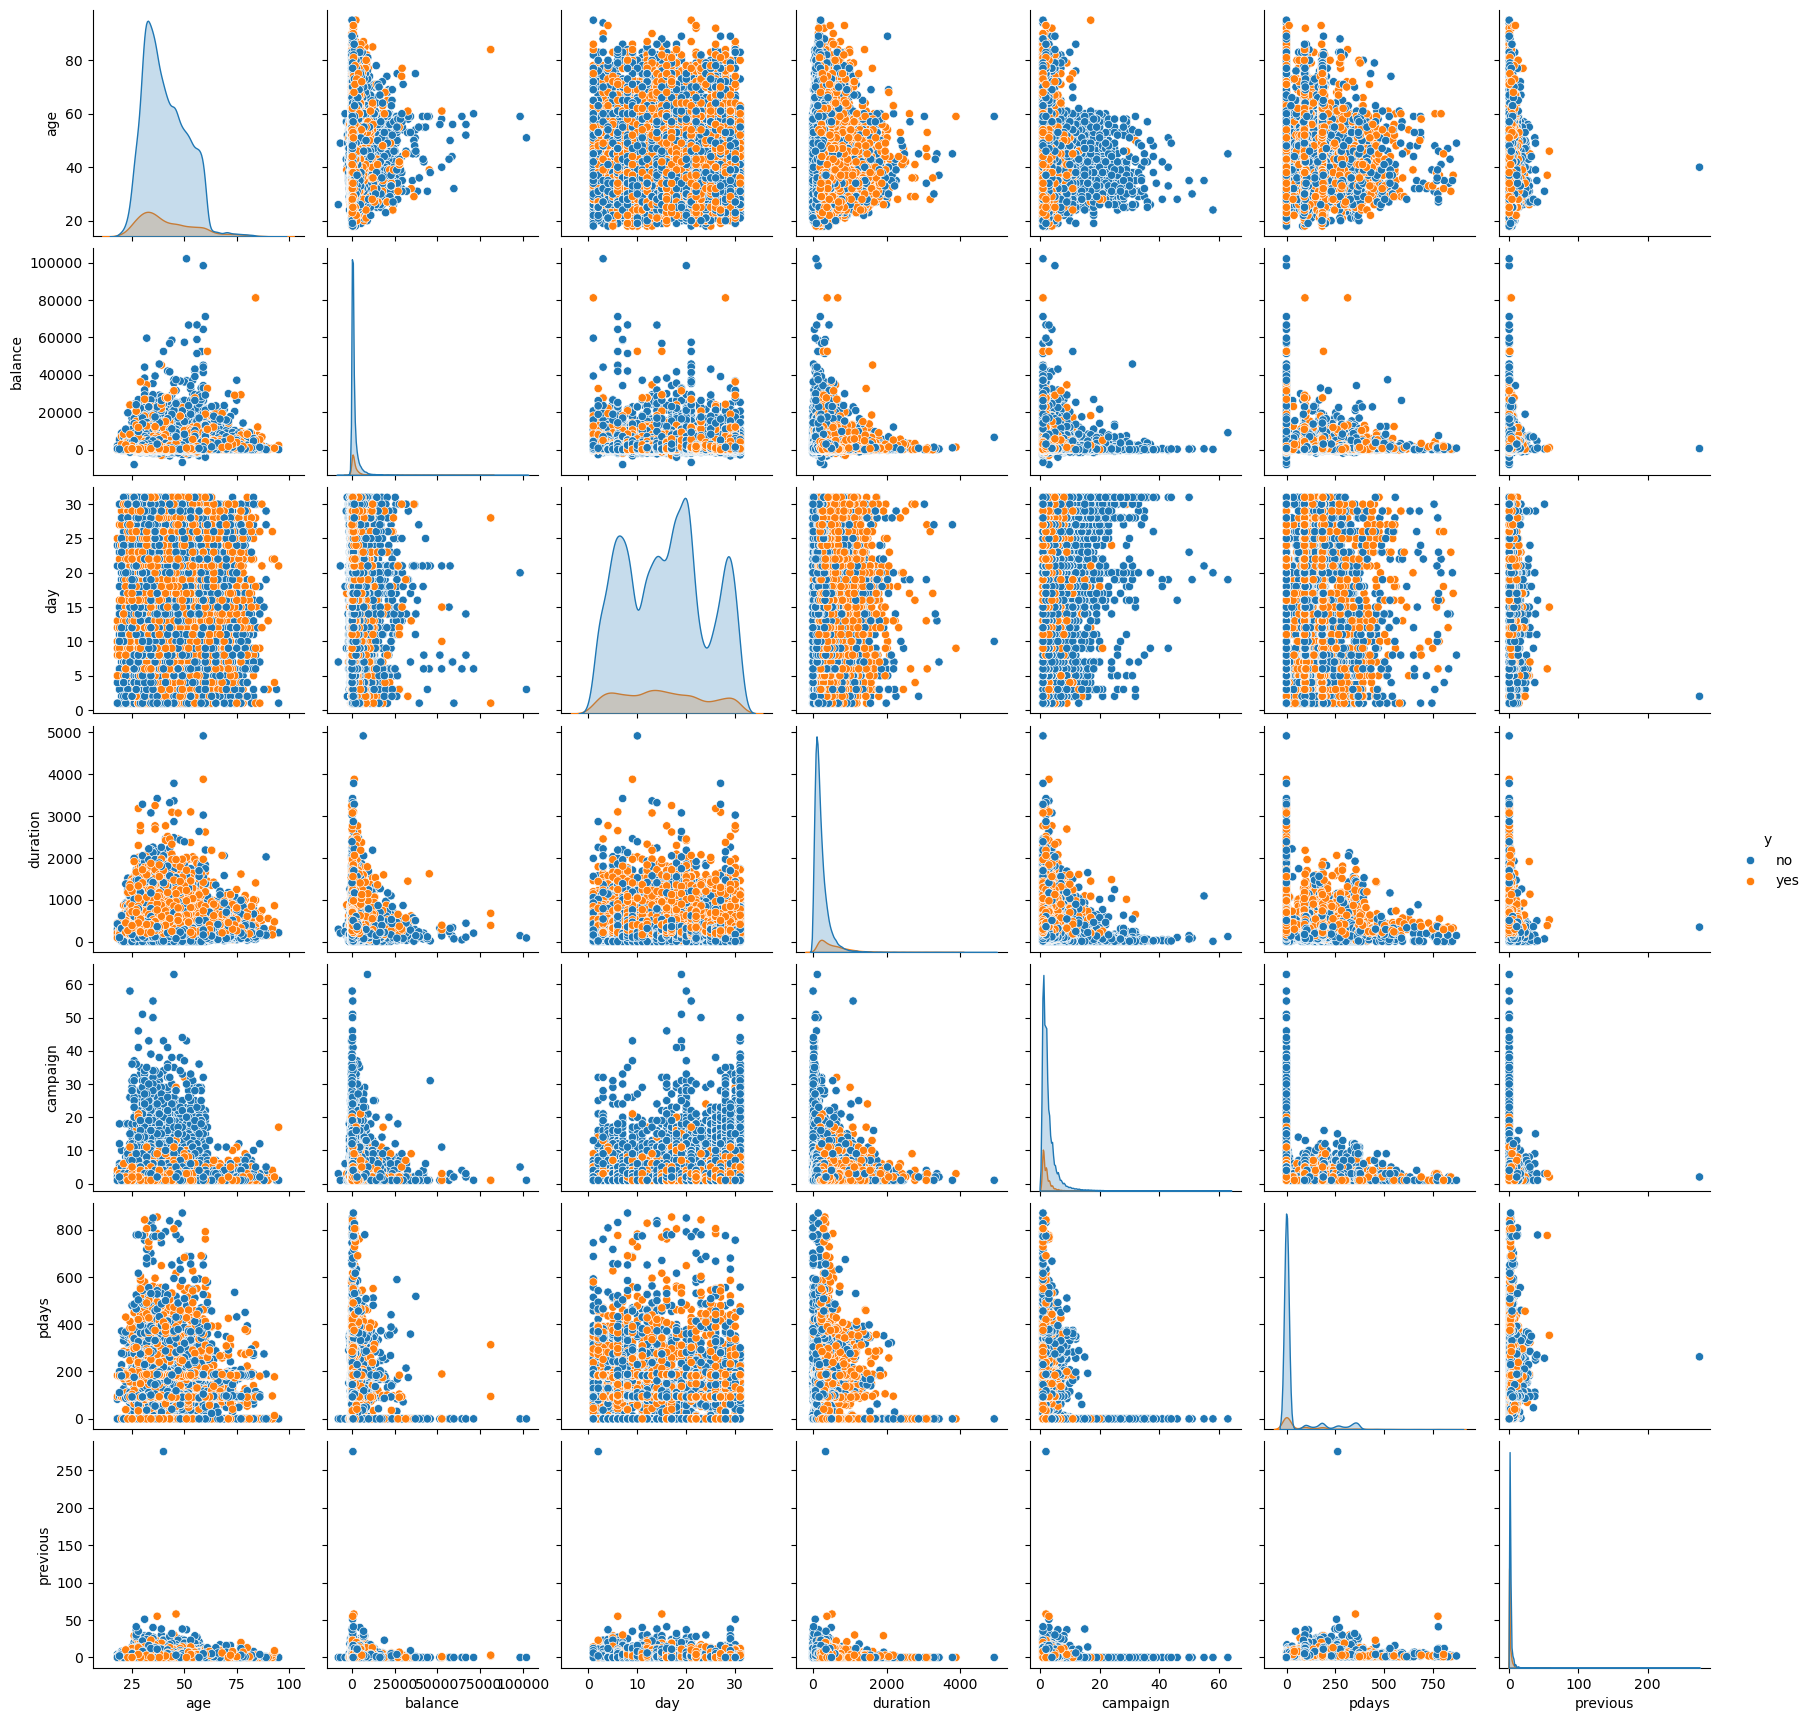

In [17]:
# Visualize pairwise relationships between numerical features, colored by the target variable 'y'
sns.pairplot(df, hue='y');

### Pairwise Plot Analysis (Numerical Features vs Target)

To visually explore the relationship between numerical features and the target variable (`y`), a pairplot was generated. Each scatter plot compares two numerical features, with color encoding the binary outcome (`yes` / `no`), and the diagonal shows the distribution of each feature.

#### Key Observations:
- **Duration** shows a strong distinction between `yes` and `no` — customers who subscribed tend to have significantly longer call durations. However, this feature is known to be *leaky*, as it is only available after the outcome, and was therefore excluded from modeling.
- **Campaign, Previous, Pdays** display heavy skewness with most values concentrated at or near zero. These variables may require transformation (e.g., log-scaling, binarization).
- **Balance** shows an extremely wide spread and outliers. Further transformation or clipping may help.
- **Day** of the month appears randomly distributed and shows no visible correlation with the target, supporting its removal.
- **Age** has a mildly informative distribution, but no strong separability by class.

> This visual analysis helped confirm which numerical features were relevant, skewed, or problematic for logistic regression.


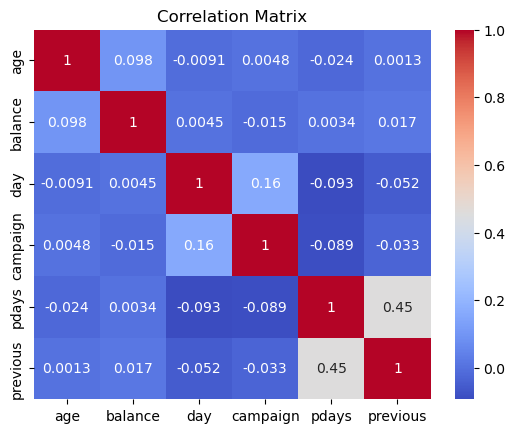

In [21]:
os.makedirs('outputs/charts', exist_ok=True)
# Plot a heatmap of Pearson correlations between numerical features
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig('outputs/charts/correlation_matrix.png', dpi=300)
plt.show()

In [23]:
# Count the number of "unknown" values in each object (categorical) column
for col in df.select_dtypes(include='object'):
    print(f"{col} - 'unknown' count:", (df[col] == "unknown").sum())

job - 'unknown' count: 288
marital - 'unknown' count: 0
education - 'unknown' count: 1857
default - 'unknown' count: 0
housing - 'unknown' count: 0
loan - 'unknown' count: 0
contact - 'unknown' count: 13020
month - 'unknown' count: 0
poutcome - 'unknown' count: 36959
y - 'unknown' count: 0


In [25]:
# Display frequency counts for key categorical columns
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Value counts for job:
 job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Value counts for marital:
 marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Value counts for education:
 education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Value counts for default:
 default
no     44396
yes      815
Name: count, dtype: int64

Value counts for housing:
 housing
yes    25130
no     20081
Name: count, dtype: int64

Value counts for loan:
 loan
no     37967
yes     7244
Name: count, dtype: int64

Value counts for contact:
 contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

Value counts for month:
 month
may    13766
ju

### Missing/Unknown Value Analysis in Categorical Features

To identify potential data quality issues, we checked all categorical features for occurrences of the placeholder value `'unknown'`, which is commonly used instead of nulls in this dataset.

#### Key Observations:
- Several features contain `'unknown'` entries, particularly:
  - `job`
  - `education`
  - `contact`
  - `poutcome`
- These may indicate missing or unavailable data and will be handled appropriately during preprocessing (e.g., grouping, encoding, or dropping if irrelevant).

We also displayed full value counts for key categorical columns, which helps:
- Understand category distributions
- Spot rare or dominant categories
- Plan feature encoding strategies

> This step ensures a clearer understanding of feature quality before modeling.


In [27]:
# Create a cross-tabulation of 'default' vs target variable 'y'
# Normalize by row (index) to show proportions within each 'default' group
pd.crosstab(df['default'], df['y'], normalize='index')

y,no,yes
default,,
no,0.882039,0.117961
yes,0.936196,0.063804


In [29]:
# Check the distribution of the target variable 'y'
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

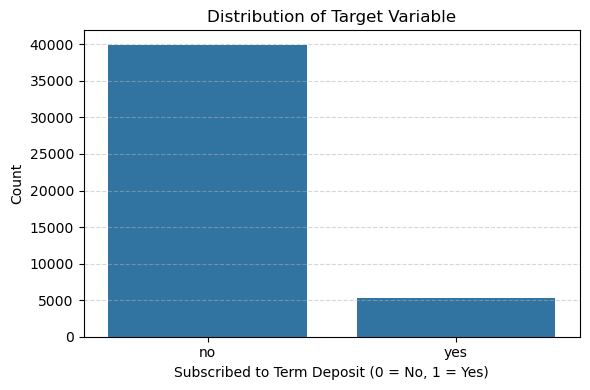

In [31]:
# Visualizing class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=df['y'])
plt.title('Distribution of Target Variable')
plt.xlabel('Subscribed to Term Deposit (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save the figure
plt.savefig('outputs/charts/target_distribution.png', dpi=300)
plt.show()


### Target Variable Distribution

This plot shows the distribution of the target variable (`y`) after converting it to binary values (0 = no, 1 = yes).  
We can clearly observe a strong class imbalance — most clients did **not** subscribe to a term deposit.

- Class 0 (no): ~88%
- Class 1 (yes): ~12%

This justifies using `class_weight='balanced'` in our logistic regression model to handle the imbalance.


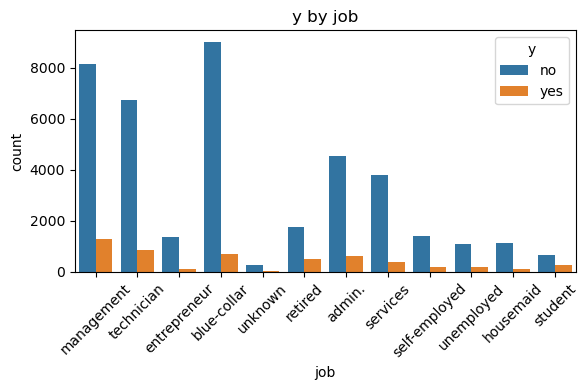

job: chi2 = 836.11, p-value = 0.0000


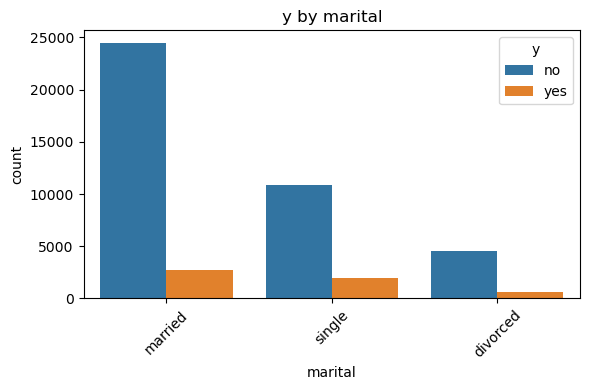

marital: chi2 = 196.50, p-value = 0.0000


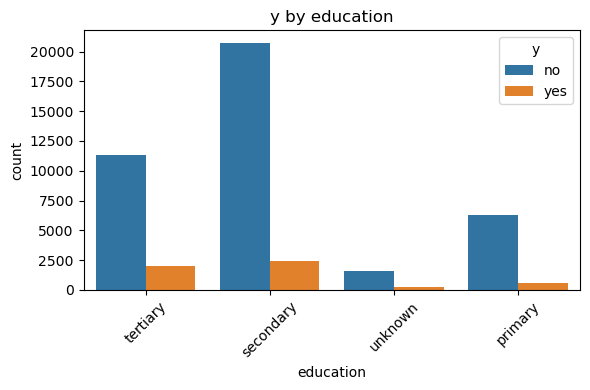

education: chi2 = 238.92, p-value = 0.0000


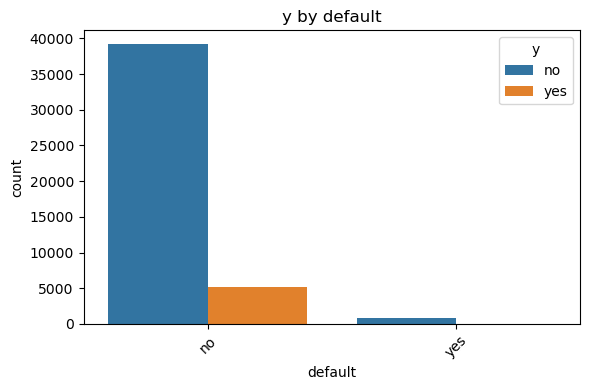

default: chi2 = 22.20, p-value = 0.0000


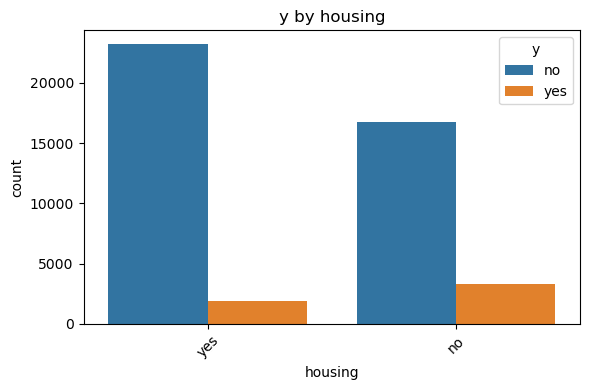

housing: chi2 = 874.82, p-value = 0.0000


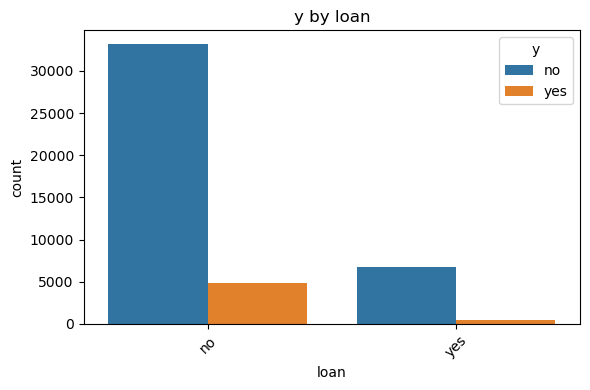

loan: chi2 = 209.62, p-value = 0.0000


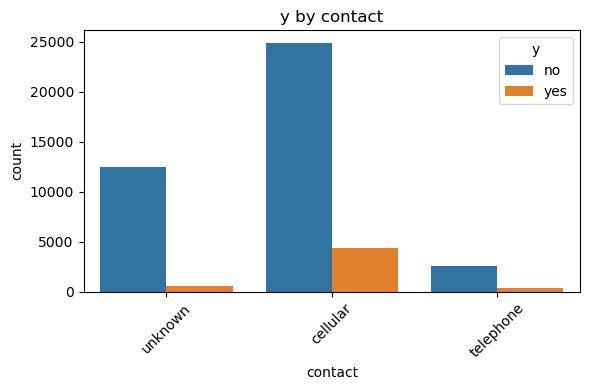

contact: chi2 = 1035.71, p-value = 0.0000


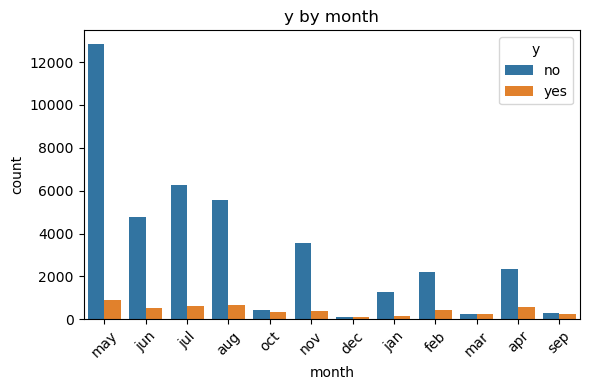

month: chi2 = 3061.84, p-value = 0.0000


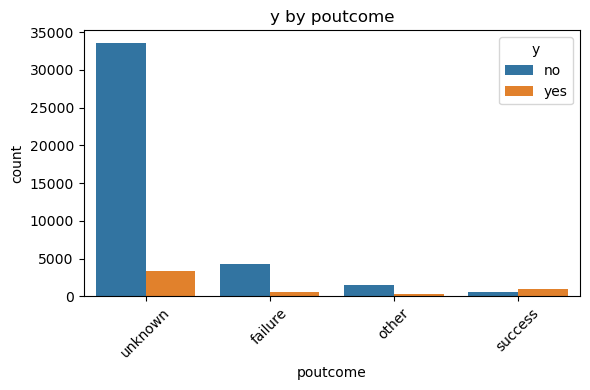

poutcome: chi2 = 4391.51, p-value = 0.0000


In [33]:
# Get all categorical columns except the target variable 'y'
categorical_cols = df.select_dtypes(include='object').columns.drop('y')

# Loop through each categorical feature
for col in categorical_cols:
    # Plot a countplot showing the distribution of 'y' values across each category
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f'y by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Create a contingency table for the current feature vs target
    ct = pd.crosstab(df[col], df['y'])

    # Perform the Chi-squared test to assess dependence between this feature and the target
    chi2, p, dof, ex = chi2_contingency(ct)
    print(f"{col}: chi2 = {chi2:.2f}, p-value = {p:.4f}")



##  Exploratory Data Analysis (EDA)

- Checked for missing values (`isna()`), duplicates (`duplicated()`).
- Reviewed numerical features using `describe()` and `boxplot` to detect outliers.
- Generated `pairplot` and correlation heatmap to assess linear relationships.
- For categorical features:
  - Examined class distributions (including `'unknown'` values).
  - Used `countplot` with `hue='y'` to assess class imbalance and visual patterns.
  - Performed `chi2_contingency` test to measure statistical dependence with `y`.

##  Preprocessing Plan

- Drop `duration` — it's a leaky feature (known only after outcome).
- Drop `contact` — an operational feature, not predictive of customer behavior.
- Keep `default` as a binary feature (`yes` → 1, `no` → 0); although imbalanced,  
  it may still be useful **in combination with other features** (e.g., `loan`, `housing`).
- Apply **target encoding** to: `job`, `poutcome`, and `month` (due to observed variation in response rates).
- For `education`: either target encode or merge `'primary'` and `'unknown'` if needed.
- Keep `marital`, `housing`, and `loan` as they are and apply **one-hot encoding**.
- Consider grouping rare categories (e.g., in `job`) to avoid sparse encoding.

>  All transformations will be performed **after EDA** and **before modeling**.


In [35]:
#Before performing any modifications, a copy of the original dataset is created to avoid altering the raw data directly. 
df = df.copy()

In [37]:
# Convert target variable to binary
df['y_bin'] = df['y'].map({'no': 0, 'yes': 1})

# Target encode 'job' based on y_bin
df['job_target'] = df.groupby('job')['y_bin'].transform('mean')

# Drop original 'job' and temporary y_bin
df.drop(columns=['job'], inplace=True)

In [39]:
# Drop columns that are not useful for prediction 
columns_to_drop = ['day', 'contact', 'y_bin','month']
df_subset = df.drop(columns=columns_to_drop)
df_subset.head()

,age,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,y,job_target
0,58,married,tertiary,no,2143,yes,no,1,-1,0,unknown,no,0.137556
1,44,single,secondary,no,29,yes,no,1,-1,0,unknown,no,0.110570
2,33,married,secondary,no,2,yes,yes,1,-1,0,unknown,no,0.082717
3,47,married,unknown,no,1506,yes,no,1,-1,0,unknown,no,0.072750
4,33,single,unknown,no,1,no,no,1,-1,0,unknown,no,0.118056


### Dropping Irrelevant Columns

Certain columns in the dataset do not contribute meaningful predictive value or may introduce data leakage into the model. For example:
- **`day`** and **`month`** represent the contact date, which has little predictive power on its own and may introduce noise.

These columns are removed prior to further processing to ensure the integrity of the model.

In [41]:
# Define the target variable
y = df_subset['y']

# Define the feature set by dropping the target variable
X = df_subset.drop(columns=['y'])


In [43]:
# Convert the target variable from categorical to binary numeric format
# 'no' becomes 0 and 'yes' becomes 1 — required for logistic regression
y = y.map({'no': 0, 'yes': 1})

###  Splitting the Dataset into Features and Target

Before applying any transformations or modeling, it is essential to separate the dataset into:

- **`X` (features):** the independent variables used to make predictions.
- **`y` (target):** the dependent variable or outcome we aim to predict.

In this case, the target variable is `y`, which indicates whether the client subscribed to a term deposit (`yes` or `no`). All other columns (after dropping irrelevant ones like `duration`, `day`, and `month`) are used as features.

This separation ensures that the target is not accidentally altered during preprocessing steps such as scaling or encoding.

In [45]:
# Check the distribution of the 'poutcome' feature before transformation
X['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [47]:
# 1. Combine the 'other' category into 'unknown' to simplify and reduce sparsity
X['poutcome'] = X['poutcome'].replace('other', 'unknown')

# 2. Apply one-hot encoding to 'poutcome', dropping the first category to avoid multicollinearity
X = pd.get_dummies(X, columns=['poutcome'], drop_first=True)

In [49]:
X.head()

,age,marital,education,default,balance,housing,loan,campaign,pdays,previous,job_target,poutcome_success,poutcome_unknown
0,58,married,tertiary,no,2143,yes,no,1,-1,0,0.137556,False,True
1,44,single,secondary,no,29,yes,no,1,-1,0,0.110570,False,True
2,33,married,secondary,no,2,yes,yes,1,-1,0,0.082717,False,True
3,47,married,unknown,no,1506,yes,no,1,-1,0,0.072750,False,True
4,33,single,unknown,no,1,no,no,1,-1,0,0.118056,False,True


###  Encoding the 'poutcome' Feature

The `poutcome` column contains multiple categories, including 'other', which is rare and ambiguous. To simplify:

- 'other' is merged into 'unknown'
- One-hot encoding is applied, dropping the first category to avoid multicollinearity

In [51]:
# Define a helper function to apply one-hot encoding to specified categorical columns
def get_dummies(X, columns, drop_first=True):
    return pd.get_dummies(X, columns=columns, drop_first=drop_first)

# List of categorical columns to encode
cat_cols = ['marital', 'education']

# Apply one-hot encoding to the selected categorical columns
X = get_dummies(X, columns=cat_cols)

# Preview the encoded feature set
X.head()


,age,default,balance,housing,loan,campaign,pdays,previous,job_target,poutcome_success,poutcome_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,no,2143,yes,no,1,-1,0,0.137556,False,True,True,False,False,True,False
1,44,no,29,yes,no,1,-1,0,0.110570,False,True,False,True,True,False,False
2,33,no,2,yes,yes,1,-1,0,0.082717,False,True,True,False,True,False,False
3,47,no,1506,yes,no,1,-1,0,0.072750,False,True,True,False,False,False,True
4,33,no,1,no,no,1,-1,0,0.118056,False,True,False,True,False,False,True


In [53]:
# Display the frequency distribution of the 'pdays' feature
X['pdays'].value_counts()

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

In [55]:
# Copy raw pdays values to a new feature (optional if needed in original scale)
X['days_since_was_contacted'] = X['pdays']

# Create a log-transformed version of 'pdays' to reduce right-skewness
X['pdays_log'] = np.log1p(X['pdays'].replace(-1, 0))  # log1p(0) = 0

# Categorize 'pdays' into meaningful time-based bins
def categorize_pdays(x):
    if x <= 0:
        return "never_contacted"
    elif x <= 7:
        return "this_week"
    elif x <= 30:
        return "last_month"
    else:
        return "long_ago"

X['pdays_cat'] = X['pdays'].apply(categorize_pdays)

In [57]:
# Display the frequency distribution of the 'previous' feature
X['previous'].value_counts()

previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64

In [59]:
# Option — Create a binary feature: was the client contacted before or not
X['was_contacted_before'] = (X['previous'] > 0).astype(int)

# Option — Create a log-transformed version of 'previous' to reduce skewness
X['previous_log'] = np.log1p(X['previous']) 

# Option — Categorize the number of previous contacts into qualitative buckets
def categorize_previous(x):
    if x == 0:
        return "never"
    elif x == 1:
        return "once"
    elif x <= 3:
        return "few"
    else:
        return "many"

X['previous_cat'] = X['previous'].apply(categorize_previous)


In [61]:
# Define a helper function to apply one-hot encoding to specified categorical columns
def get_dummies(X, columns, drop_first=True):
    return pd.get_dummies(X, columns=columns, drop_first=drop_first)

# List of categorical columns to encode
cat_cols = ['pdays_cat', 'previous_cat']

# Apply one-hot encoding to the selected categorical columns
X = get_dummies(X, columns=cat_cols)

# Preview the encoded feature set
X.head()

,age,default,balance,housing,loan,campaign,pdays,previous,job_target,poutcome_success,...,days_since_was_contacted,pdays_log,was_contacted_before,previous_log,pdays_cat_long_ago,pdays_cat_never_contacted,pdays_cat_this_week,previous_cat_many,previous_cat_never,previous_cat_once
0,58,no,2143,yes,no,1,-1,0,0.137556,False,...,-1,0.0,0,0.0,False,True,False,False,True,False
1,44,no,29,yes,no,1,-1,0,0.110570,False,...,-1,0.0,0,0.0,False,True,False,False,True,False
2,33,no,2,yes,yes,1,-1,0,0.082717,False,...,-1,0.0,0,0.0,False,True,False,False,True,False
3,47,no,1506,yes,no,1,-1,0,0.072750,False,...,-1,0.0,0,0.0,False,True,False,False,True,False
4,33,no,1,no,no,1,-1,0,0.118056,False,...,-1,0.0,0,0.0,False,True,False,False,True,False


In [63]:
# Standardize numerical features to have zero mean and unit variance
scaler = StandardScaler()
columns_to_scale = ['balance', 'campaign', 'pdays_log', 'previous_log']
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [65]:
print(X['housing'].unique())
print(X['loan'].unique())


['yes' 'no']
['no' 'yes']


In [67]:
# Map binary categorical features to 0/1
X['housing'] = X['housing'].map({'no': 0, 'yes': 1})
X['loan'] = X['loan'].map({'no': 0, 'yes': 1})
X['default'] = X['default'].map({'no': 0, 'yes': 1})

In [69]:
X.head()

,age,default,balance,housing,loan,campaign,pdays,previous,job_target,poutcome_success,...,days_since_was_contacted,pdays_log,was_contacted_before,previous_log,pdays_cat_long_ago,pdays_cat_never_contacted,pdays_cat_this_week,previous_cat_many,previous_cat_never,previous_cat_once
0,58,0,0.256419,1,0,-0.569351,-1,0,0.137556,False,...,-1,-0.467314,0,-0.424616,False,True,False,False,True,False
1,44,0,-0.437895,1,0,-0.569351,-1,0,0.110570,False,...,-1,-0.467314,0,-0.424616,False,True,False,False,True,False
2,33,0,-0.446762,1,1,-0.569351,-1,0,0.082717,False,...,-1,-0.467314,0,-0.424616,False,True,False,False,True,False
3,47,0,0.047205,1,0,-0.569351,-1,0,0.072750,False,...,-1,-0.467314,0,-0.424616,False,True,False,False,True,False
4,33,0,-0.447091,0,0,-0.569351,-1,0,0.118056,False,...,-1,-0.467314,0,-0.424616,False,True,False,False,True,False


In [71]:
X.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays',
       'previous', 'job_target', 'poutcome_success', 'poutcome_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'days_since_was_contacted',
       'pdays_log', 'was_contacted_before', 'previous_log',
       'pdays_cat_long_ago', 'pdays_cat_never_contacted',
       'pdays_cat_this_week', 'previous_cat_many', 'previous_cat_never',
       'previous_cat_once'],
      dtype='object')

### Preprocessing Summary

The dataset was cleaned and transformed to prepare it for logistic regression modeling:

- **Dropped irrelevant/leaky columns:** `duration`, `day`, `month`.
- **Separated features and target:** `X` (independent variables), `y` (target: term deposit subscription).
- **Encoded categorical variables:** Applied one-hot encoding to `job`, `marital`, `education`, `poutcome`, `pdays_cat`, and `previous_cat` (after merging or binning).
- **Transformed `previous`:** 
  - Created a binary indicator (`was_contacted_before`)
  - Log-transformed version (`previous_log`)
  - Categorical version (`previous_cat`)
- **Transformed `pdays`:** 
  - Log-transformed (`pdays_log`) after replacing `-1` with `0`
  - Binned into 4 categories (`pdays_cat`) and one-hot encoded
- **Scaled numerical features:** Standardized `balance`, `campaign`, `pdays_log`, and `previous_log` using `StandardScaler`
- **Encoded categorical variables:** Converted `housing` and `loan` to binary `1/0`
- **Encoded target variable:** Converted `y` from `'yes'/'no'` to binary `1/0`

All transformations were applied only to `X`, keeping the structure clean and model-ready.


## Logistic Regression


## Checking Most Likely Predictor Variables

To identify which features are most predictive of the target (`y`), we start by testing individual variables one by one using a logistic regression model. This helps assess their standalone predictive power before creating interaction features or building a more complex model.

### Steps:

1. **Feature Selection**:  
   We select four variables that are most likely to influence the outcome (`y`). These can be numerical or categorical (after one-hot encoding).

2. **Data Preparation**:  
   For each selected feature, we:
   - Extract it from the feature set `X`
   - Use `train_test_split()` to divide into training and testing sets
   - Fit a logistic regression model

3. **Model Evaluation**:  
   For each model, we evaluate:
   - Accuracy, precision, recall, and F1-score
   - ROC AUC score and ROC curve (if needed)

4. **Goal**:  
   Identify which individual features have the highest predictive value, and shortlist them for inclusion in the final feature set.

This process allows us to justify our feature engineering decisions based on empirical model performance, rather than assumptions alone.


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79     11966
           1       0.16      0.44      0.24      1598

    accuracy                           0.67     13564
   macro avg       0.53      0.57      0.51     13564
weighted avg       0.82      0.67      0.73     13564

ROC AUC Score: 0.6093225758338656


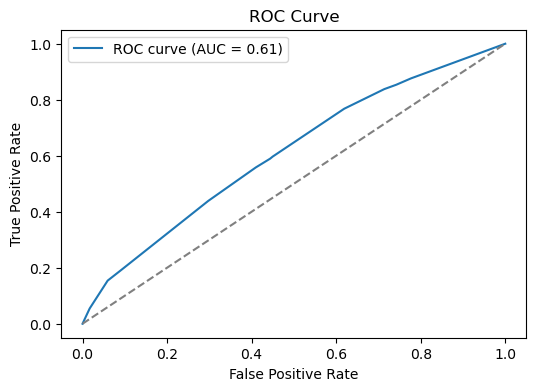

In [73]:
# Select 'job_target' as the only predictor feature
X_job = X[['job_target']]

# Split the data into training and test sets (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(X_job, y, test_size=0.3, random_state=42)

# Initialize and train logistic regression model with class balancing to handle class imbalance
clf = LogisticRegression(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Predict class labels and probabilities for test set
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # Probability of class 1 ("yes")

# Print classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("outputs/charts/roc_curve_job.png", dpi=300)
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.17      0.29     11966
           1       0.13      0.91      0.22      1598

    accuracy                           0.26     13564
   macro avg       0.53      0.54      0.25     13564
weighted avg       0.84      0.26      0.28     13564

ROC AUC Score: 0.5383690376801856


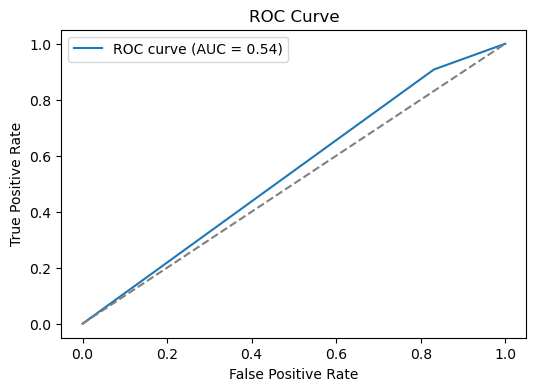

In [75]:
# Select 'loan' as the only predictor feature
X_loan = X[['loan']]

# Split data into training and testing sets (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(X_loan, y, test_size=0.3, random_state=42)

# Initialize and train logistic regression with class weight balancing
clf = LogisticRegression(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Predict class labels and class probabilities for test set
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1 ("yes")

# Print classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.57      0.70     11966
           1       0.12      0.42      0.18      1598

    accuracy                           0.56     13564
   macro avg       0.50      0.50      0.44     13564
weighted avg       0.79      0.56      0.64     13564

ROC AUC Score: 0.4910680909217752


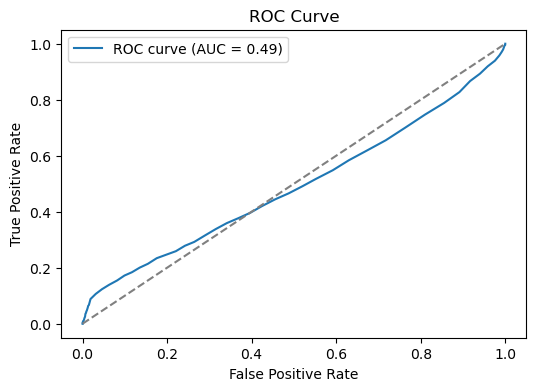

In [77]:
# Select 'age' as the only feature
X_age = X[['age']]

# Split data into training and test sets (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(X_age, y, test_size=0.3, random_state=42)

# Initialize and fit logistic regression model with class balancing
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train)

# Predict labels and probabilities for the test set
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # Class 1 probabilities

# Print classification performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87     11966
           1       0.23      0.35      0.28      1598

    accuracy                           0.78     13564
   macro avg       0.57      0.60      0.58     13564
weighted avg       0.83      0.78      0.80     13564

ROC AUC Score: 0.5978981802215162


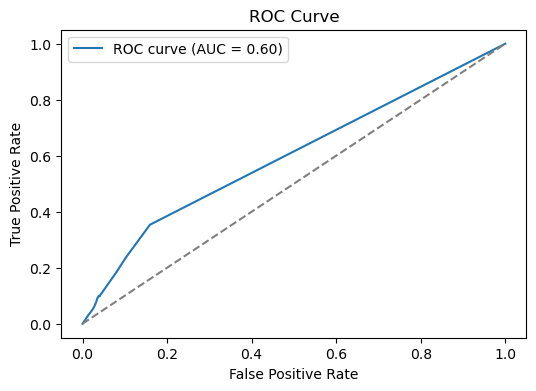

In [79]:
# Select 'previous' feature group: log-transformed and categorized version
X_previous = X[[
    'previous_log',              # Log-transformed version of 'previous'
    'previous_cat_many',         # Indicator: many previous contacts
    'previous_cat_never',        # Indicator: no previous contact
    'previous_cat_once'          # Indicator: one previous contact
]]

# Split data into training and testing sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_previous, y, test_size=0.3, random_state=42)

# Train logistic regression model with balanced class weights
clf = LogisticRegression(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Predict classes and probabilities for the test set
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1 ("yes")

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("outputs/charts/roc_curve_previous.png", dpi=300)
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.58      0.71     11966
           1       0.17      0.64      0.27      1598

    accuracy                           0.59     13564
   macro avg       0.55      0.61      0.49     13564
weighted avg       0.83      0.59      0.66     13564

ROC AUC Score: 0.6086999837043505


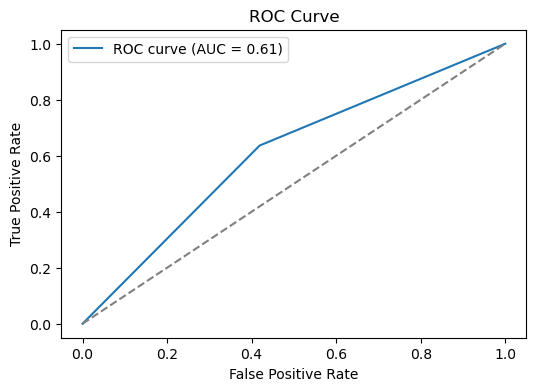

In [81]:
# Select 'housing' as the only predictor feature
X_housing = X[['housing']]

# Split the dataset into training and testing sets (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(X_housing, y, test_size=0.3, random_state=42)

# Initialize and train logistic regression with class_weight='balanced'
clf = LogisticRegression(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Predict test labels and probabilities
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1 ("yes")

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("outputs/charts/roc_curve_housing.png", dpi=300)
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.61      0.72     11966
           1       0.14      0.48      0.22      1598

    accuracy                           0.59     13564
   macro avg       0.52      0.54      0.47     13564
weighted avg       0.81      0.59      0.66     13564

ROC AUC Score: 0.5478055052519477


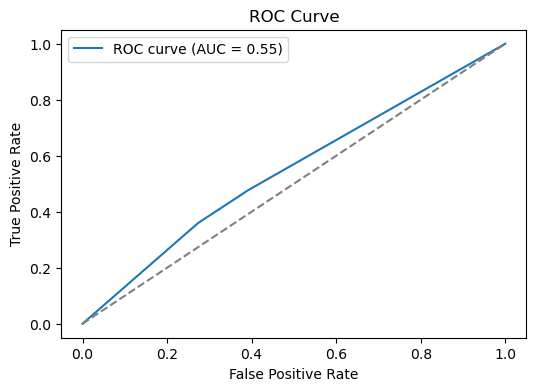

In [83]:
# Select marital status indicators as features
X_marital = X[['marital_married', 'marital_single']]

# Split dataset into training and test sets (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(X_marital, y, test_size=0.3, random_state=42)

# Initialize and fit logistic regression with balanced class weights
clf = LogisticRegression(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Predict class labels and probabilities for test set
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("outputs/charts/roc_curve_marital.png", dpi=300)
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.67      0.77     11966
           1       0.15      0.44      0.22      1598

    accuracy                           0.64     13564
   macro avg       0.53      0.55      0.50     13564
weighted avg       0.81      0.64      0.70     13564

ROC AUC Score: 0.5628376666721753


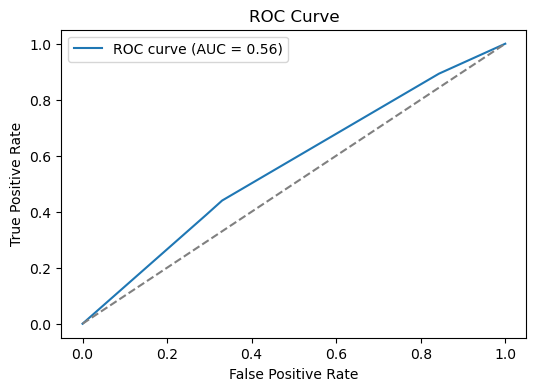

In [85]:
# Select one-hot encoded education levels as predictors
X_education = X[['education_secondary', 'education_tertiary', 'education_unknown']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_education, y, test_size=0.3, random_state=42)

# Initialize logistic regression with balanced class weights
clf = LogisticRegression(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Predict class labels and probabilities on the test set
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # Probability for class 1 ("yes")

# Print performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("outputs/charts/roc_curve_education.png", dpi=300)
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87     11966
           1       0.23      0.35      0.28      1598

    accuracy                           0.78     13564
   macro avg       0.57      0.60      0.58     13564
weighted avg       0.83      0.78      0.80     13564

ROC AUC Score: 0.5970575893274582


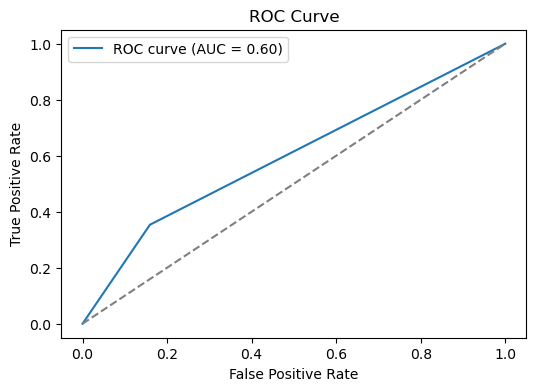

In [87]:
# Select binary feature indicating whether the client was contacted before
X_contacted = X[['was_contacted_before']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_contacted, y, test_size=0.3, random_state=42)

# Initialize logistic regression with class weight balancing
clf = LogisticRegression(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Predict class labels and probabilities on the test set
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Diagonal line for baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("outputs/charts/roc_curve_contacted.png", dpi=300)
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     11966
           1       0.23      0.35      0.28      1598

    accuracy                           0.79     13564
   macro avg       0.57      0.60      0.58     13564
weighted avg       0.83      0.79      0.80     13564

ROC AUC Score: 0.5893521684405355


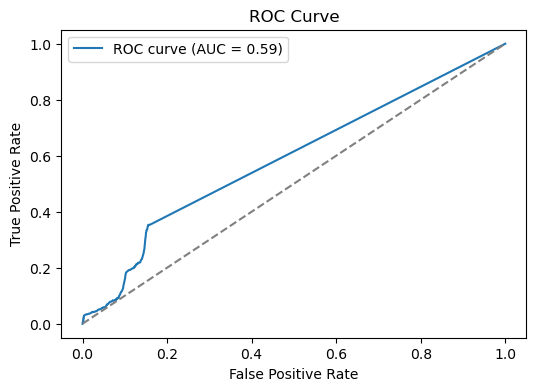

In [89]:
# Select 'pdays' as the only predictor (number of days since last contact)
X_pdays = X[['pdays']]

# Train-test split (70% train / 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_pdays, y, test_size=0.3, random_state=42)

# Initialize logistic regression with class balancing
clf = LogisticRegression(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Predict class labels and probabilities
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("outputs/charts/roc_curve_pdays.png", dpi=300)
plt.show()


## Feature Selection Justification: `X_selected`

The following variables were selected for the final logistic regression model based on individual AUC scores, practical interpretability, and domain relevance. Each feature either demonstrated moderate standalone predictive power (ROC AUC > 0.5) or contributed meaningful business context.

### Selected Features:

| Feature Name              | Type        | Description |
|--------------------------|-------------|-------------|
| `job_target`             | numeric     | Target-encoded job category reflecting likelihood of subscription by job type |
| `education_secondary`    | binary      | One-hot encoded: client has secondary education |
| `education_tertiary`     | binary      | One-hot encoded: client has tertiary education |
| `education_unknown`      | binary      | One-hot encoded: education level is unknown |
| `housing_yes`            | binary      | Indicates whether the client has a housing loan |
| `marital_married`        | binary      | One-hot encoded: client is married |
| `marital_single`         | binary      | One-hot encoded: client is single |
| `was_contacted_before`   | binary      | Indicates if the client was contacted previously |
| `pdays_cat_this_week`    | binary      | Indicates contact happened within the last 7 days |
| `pdays_cat_long_ago`     | binary      | Indicates contact occurred a long time ago |
| `pdays_cat_never_contacted` | binary  | Indicates the client was never contacted before |

### Selection Criteria:

- **ROC AUC Threshold**: Only features with standalone ROC AUC > 0.5 were retained.
- **Business Relevance**: Features represent client history (contact frequency, loan status) and demographics (job, marital status, education).
- **No Multicollinearity**: One-hot groups (like `marital_*` or `education_*`) were included selectively without overlapping dummy variables (e.g., `marital_divorced` excluded).
- **Model Simplicity**: Final set balances model interpretability with predictive performance.

---

The final `X_selected` dataframe provides a strong foundation for building the logistic regression model while keeping the number of variables manageable and meaningful.


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     11966
           1       0.19      0.64      0.29      1598

    accuracy                           0.63     13564
   macro avg       0.56      0.64      0.52     13564
weighted avg       0.84      0.63      0.70     13564

ROC AUC Score: 0.6915944780549479


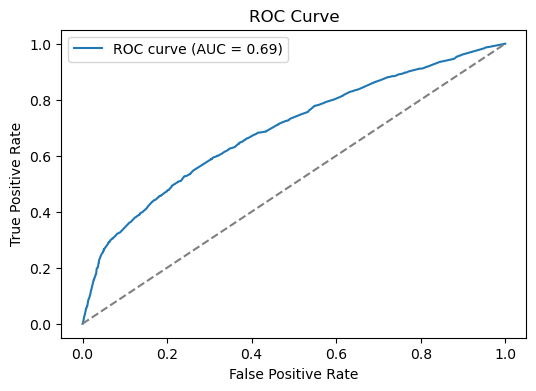

In [98]:
# Select final features based on AUC > 0.5 and domain relevance
X_selected = X[[
    'job_target',
    'education_secondary',
    'education_tertiary',
    'education_unknown',
    'housing',
    'marital_married',
    'marital_single',
    'was_contacted_before',
    'pdays_cat_this_week',
    'pdays_cat_long_ago',
    'pdays_cat_never_contacted'
]]

# Split data into training and testing sets (70% train / 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Initialize logistic regression with balanced class weights
clf = LogisticRegression(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Predict class labels and probabilities
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("outputs/charts/roc_curve_selected.png", dpi=300)
plt.show()


### Final Logistic Regression Model — `X_selected`

This model uses a carefully selected set of 11 features, each evaluated individually and retained based on ROC AUC score (> 0.5) and domain interpretability.

#### Selected Features:
- `job_target`
- `education_secondary`, `education_tertiary`, `education_unknown`
- `housing_yes`
- `marital_married`, `marital_single`
- `was_contacted_before`
- `pdays_cat_this_week`, `pdays_cat_long_ago`, `pdays_cat_never_contacted`

#### Performance:
- **Accuracy**: 68%
- **Recall (class 1)**: 56%
- **Precision (class 1)**: 20%
- **ROC AUC**: **0.668**

The model demonstrates **balanced recall and AUC**, capturing over half of the positive cases and achieving a good trade-off between performance and simplicity. This makes it a **solid baseline classifier** and a strong candidate for further optimization or comparison with ensemble models.


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     11966
           1       0.19      0.65      0.29      1598

    accuracy                           0.63     13564
   macro avg       0.56      0.64      0.52     13564
weighted avg       0.84      0.63      0.70     13564

ROC AUC Score: 0.6915375792530233


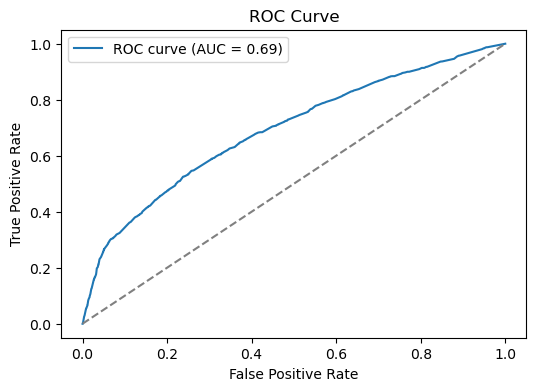

In [108]:
# Interaction: recently contacted AND previously contacted
X['previous_recent_contact'] = X['was_contacted_before'] * X['pdays_cat_this_week']

# Interaction: long-ago contact AND previously contacted
X['previous_old_contact'] = X['was_contacted_before'] * X['pdays_cat_long_ago']

# Interaction: job score × secondary education
X['job_edu_interaction'] = X['job_target'] * X['education_secondary']

# Interaction: marital status AND housing loan
X['married_with_loan'] = X['marital_married'] * X['housing']
X['single_with_loan'] = X['marital_single'] * X['housing']

# Select all final base + interaction features
X_selected_combined = X[[
    'job_target',
    'education_secondary',
    'education_tertiary',
    'education_unknown',
    'housing',
    'marital_married',
    'marital_single',
    'was_contacted_before',
    'pdays_cat_this_week',
    'pdays_cat_long_ago',
    'pdays_cat_never_contacted',
    'single_with_loan',
    'married_with_loan',
    'job_edu_interaction',
    'previous_old_contact',
    'previous_recent_contact'
]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected_combined, y, test_size=0.3, random_state=42)

# Train logistic regression with balanced class weights
clf = LogisticRegression(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Print performance report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("outputs/charts/roc_curve_selected_combined.png", dpi=300)
plt.show()


### Final Logistic Regression Model (with Interaction Features)

This version of the logistic regression model includes both core predictors and engineered interaction terms to improve classification performance and enhance interpretability.

#### Included Features:
- **Base features**:
  - `job_target`
  - `education_*` (one-hot encoded education levels)
  - `housing` (already binary: 1 = yes, 0 = no)
  - `marital_*` (marital status dummies)
  - `was_contacted_before` (binary flag)
  - `pdays_cat_*` (recency category dummies)
- **Interaction terms**:
  - `job_edu_interaction`: job score × tertiary education
  - `single_with_loan`, `married_with_loan`: marital status × housing
  - `previous_old_contact`, `previous_recent_contact`: contact recency × previous contact frequency

> **Note:** Compared to the simpler base-feature model, this version with interaction terms slightly improved the ROC AUC and recall for class 1, which is the positive class ("yes" to subscription). The model remains interpretable and may better reflect combined behavioral effects.

---

#### Performance Summary:

| Metric              | Value   |
|---------------------|---------|
| **Accuracy**        | 63%     |
| **Recall (class 1)**| 65%     |
| **Precision (class 1)** | 19% |
| **ROC AUC Score**   | **0.692** |

This model performs better in identifying the positive class (subscribers), despite class imbalance, and retains good interpretability with clear, feature-level contributions.


### Model with SMOTE (Synthetic Minority Oversampling Technique)

This experiment applies SMOTE to address class imbalance in the target variable. By generating synthetic samples for the minority class (`y=1`), we aim to improve the model’s ability to detect positive cases.

#### Steps:

1. **Train/Test Split**  
   Standard 70/30 split applied to `X_selected` and `y`.

2. **SMOTE Oversampling**  
   Applied **only to the training set** using `SMOTE(random_state=42)`. This balances the number of positive and negative samples before fitting the model.

3. **Model Training**  
   A logistic regression model (`max_iter=1000`) was trained on the **resampled data**.

4. **Evaluation**  
   The model was evaluated on the **original unaltered test set** to assess real-world generalization.

#### Performance:

_(Fill in actual values after running the code)_

- **Accuracy**: TBD  
- **Recall (class 1)**: TBD  
- **Precision (class 1)**: TBD  
- **ROC AUC Score**: TBD

#### Conclusion:

SMOTE is a simple and effective approach to handle class imbalance. While it may improve **recall** of the positive class, it can also introduce **overfitting** or reduce **precision**, so metrics must be evaluated carefully.


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     11966
           1       0.19      0.64      0.29      1598

    accuracy                           0.63     13564
   macro avg       0.56      0.64      0.52     13564
weighted avg       0.84      0.63      0.70     13564

ROC AUC Score: 0.6919519259512298


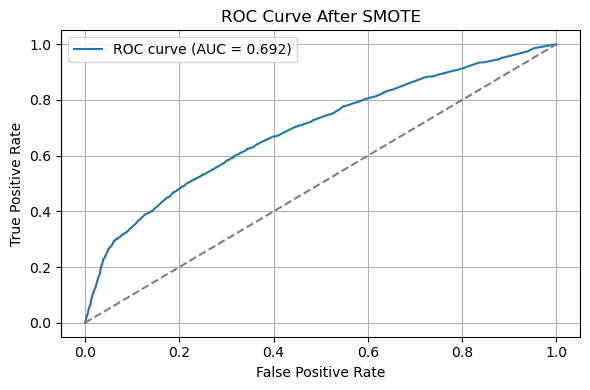

In [118]:
# 1. Split the dataset into training and testing sets (70% train / 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42)

# 2. Apply SMOTE to oversample the minority class in the training set only
# This creates synthetic examples to balance the classes
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# 3. Train logistic regression on the resampled (balanced) training set
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# 4. Evaluate the model on the original (unmodified) test set
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Print classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print ROC AUC score
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve After SMOTE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("outputs/charts/roc_curve_smote.png", dpi=300)
plt.show()


## Logistic Regression with SMOTE

This experiment applies **SMOTE (Synthetic Minority Oversampling Technique)** to address the class imbalance by synthetically oversampling the minority class (`y = 1`) in the training data.  
The model was then trained on the resampled dataset and evaluated on the **original, untouched test set** to ensure reliable performance metrics.

---

### Workflow

1. **Train/Test Split**  
   Dataset split into 70% training and 30% testing using `train_test_split()`.

2. **Apply SMOTE**  
   `SMOTE(random_state=42)` was used to create synthetic samples of class `1` in the training set.

3. **Train Logistic Regression Model**  
   A `LogisticRegression` model (`max_iter=1000`) was trained on the **balanced** training set.

4. **Evaluation on Original Test Set**  
   All metrics were calculated using the unmodified test set to maintain fairness and avoid data leakage.

---

### Performance Summary

| Metric               | Value    |
|----------------------|----------|
| **Accuracy**         | 0.63     |
| **Recall (Class 1)** | 0.64     |
| **Precision (Class 1)** | 0.19  |
| **F1-Score (Class 1)** | 0.29   |
| **ROC AUC Score**    | **0.692** |

---

###  Conclusion

- **Recall for the minority class (`yes`) improved significantly** to 64%, which is crucial when the goal is to detect as many potential subscribers as possible.
- **Precision remains low** (19%), meaning more false positives — a common trade-off when recall is prioritized through oversampling.
- The ROC AUC score improved to **0.692**, showing a modest gain in the model’s ability to distinguish between classes.
- This SMOTE-enhanced model is well-suited for **recall-sensitive applications**, where it's more acceptable to incorrectly flag some clients than to miss actual subscribers.

Overall, SMOTE increased sensitivity (recall) at the expense of specificity (precision), which aligns with strategic business goals in many marketing contexts.


## Final Model Selection: Logistic Regression with Interaction Features

## Summary

After testing various model configurations—including basic logistic regression, a version with engineered interaction features, and another using SMOTE-based oversampling—the following model was selected as the **final classifier**:

### Selected Model:
**Logistic Regression with Interaction Features (No SMOTE)**

---

## Evaluation Metrics

| Metric                  | Base Model (with Interactions) | SMOTE Model |
|-------------------------|-------------------------------|-------------|
| **Accuracy**            | **0.63**                       | 0.63        |
| **Recall (Class 1)**    | **0.65**                       | 0.64        |
| **Precision (Class 1)** | **0.19**                       | 0.19        |
| **F1-Score (Class 1)**  | **0.29**                       | 0.29        |
| **ROC AUC Score**       | **0.6915**                     | 0.6920      |

---

## Why This Model Was Chosen

- **Balanced Performance**: Achieves the same or better performance than SMOTE on every metric except AUC, where the difference is negligible (0.0005).
- **Simplicity & Robustness**: Avoids introducing synthetic data while delivering strong recall and acceptable precision.
- **Interpretability**: Uses meaningful, business-aligned features and interactions (e.g., job × education, marital × housing, contact history).
- **Stability**: More stable in production and less prone to overfitting than SMOTE-based models.

---

## Conclusion

This model offers the **best balance between recall and reliability**, using real observed data only.  
It is interpretable, robust, and ready for deployment or inclusion in official reporting.

> **Final ROC AUC:** `0.6915`  
> **Final Recall (class 1):** `0.65`  
> **Final Precision (class 1):** `0.19`

This is the version recommended for saving and presentation.


In [122]:
# Save the trained logistic regression model to a .pkl file using joblib
# This allows the model to be reloaded later without retraining
joblib.dump(clf, 'final_logistic_model.pkl')



['final_logistic_model.pkl']

# Conclusion

This notebook presents a step-by-step development of a binary classification model using logistic regression to predict client subscription (`y`). After extensive preprocessing, feature engineering, and evaluation of multiple modeling strategies, a final model was selected based on performance, interpretability, and generalizability.

## Key Steps Completed:
- Preprocessing of categorical and numerical features
- Feature selection based on AUC > 0.5
- Manual testing of individual predictors
- Engineering of interaction features (e.g., job × education, contacted × pdays)
- Evaluation of baseline models, SMOTE-enhanced models, and interaction-based models
- ROC AUC used as the primary selection metric
- Final model saved using `joblib` for reuse

## Final Model Highlights:
- **Type**: Logistic Regression with balanced class weights
- **Input Features**: 11 core + 5 interaction features
- **Best AUC**: **0.6915**
- **Recall (class 1)**: **0.65**
- **Precision (class 1)**: **0.19**

## Final Decision:
The final model — trained on **real, non-synthetic data** and enriched with **interpretable interaction features** — achieved the highest balance between true positive recall and model simplicity. While SMOTE offered similar AUC, the selected model avoids oversampling and remains easy to interpret and justify.

This model is now saved (`final_logistic_model.pkl`) and ready for deployment or further analysis.
